# Linear Regression in TensorFlow

### Simple Linear Regression

$$y = W \times x + b$$

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = np.linspace(1, 10, 20) + np.random.randn(20) * 0.5
train_Y = np.linspace(1, 4, 20) + np.random.randn(20) * 0.5

n_samples = train_X.shape[0]

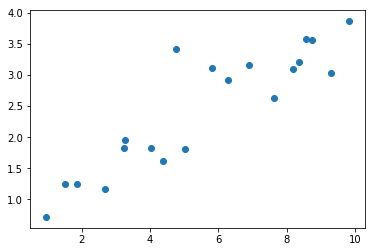

In [4]:
plt.scatter(train_X, train_Y)

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
# Create Model

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [7]:
# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [8]:
# Mean the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [9]:
# Initializing the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.102463506 W= 0.372069 b= 0.27407
Epoch: 0200 cost= 0.096549489 W= 0.36137 b= 0.3504
Epoch: 0300 cost= 0.092502788 W= 0.35251 b= 0.413608
Epoch: 0400 cost= 0.089735113 W= 0.345174 b= 0.465948
Epoch: 0500 cost= 0.087843239 W= 0.339098 b= 0.509289
Epoch: 0600 cost= 0.086550839 W= 0.334068 b= 0.545179
Epoch: 0700 cost= 0.085668668 W= 0.329902 b= 0.5749
Epoch: 0800 cost= 0.085067153 W= 0.326452 b= 0.599509
Epoch: 0900 cost= 0.084657431 W= 0.323596 b= 0.619889
Epoch: 1000 cost= 0.084378794 W= 0.32123 b= 0.636765
Optimization Finished!
cost= 0.0843788 W= 0.32123 b= 0.636765


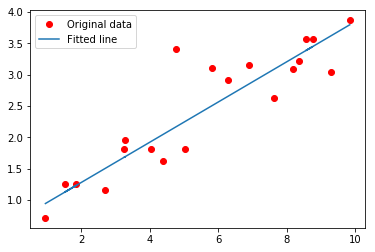

In [10]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, 
                                                          Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), 
             label='Fitted line')
    plt.legend()
    plt.show()